# 1. Find out how many males and females participated in the test.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\ACER\Downloads\StudentsPerformance.csv")

In [8]:
# Summary statistics for all numeric columns

In [9]:
print(data.describe())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.001000      69.195000      68.119000
std      15.569567      14.706436      15.226381
min       0.000000      17.000000      10.000000
25%      57.000000      59.000000      58.000000
50%      66.000000      70.000000      69.000000
75%      77.000000      79.250000      79.000000
max     100.000000     100.000000     100.000000


In [10]:
# Summary statistics by gender

In [11]:
print(data.groupby('gender').describe())

       math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.590734  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.545643  ...  76.0  100.0         482.0  63.446058   

                                                  
              std   min   25%   50%   75%    max  
gender                                            
female  14.844842  10.0  64.0  74.0  82.0  100.0  
male    14.227225  15.0  53.0  64.

In [12]:
# Count of males and females

In [13]:
print(data['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


# 2. What do you think about the students' parental level of education?

In [72]:
parental_education = data["parental level of education"]

In [71]:
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'some high school'),
  Text(1, 0, 'high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

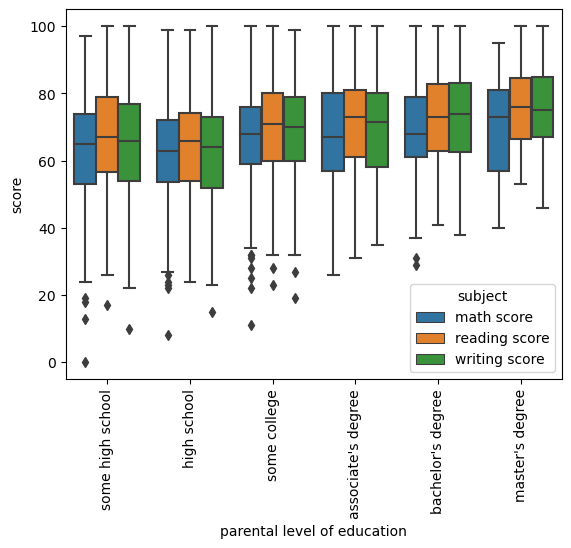

In [179]:
import pandas as pd
import seaborn as sns


# Melt the data to long format
melted_data = pd.melt(data, id_vars=['parental level of education'], value_vars=['math score', 'reading score', 'writing score'],
                      var_name='subject', value_name='score')
sns.boxplot(x='parental level of education', y='score', hue='subject', data=melted_data)
plt.xticks(rotation=90)


C:\Users\ACER\AppData\Local\Temp\ipykernel_17976\57871738.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('parental level of education').mean()


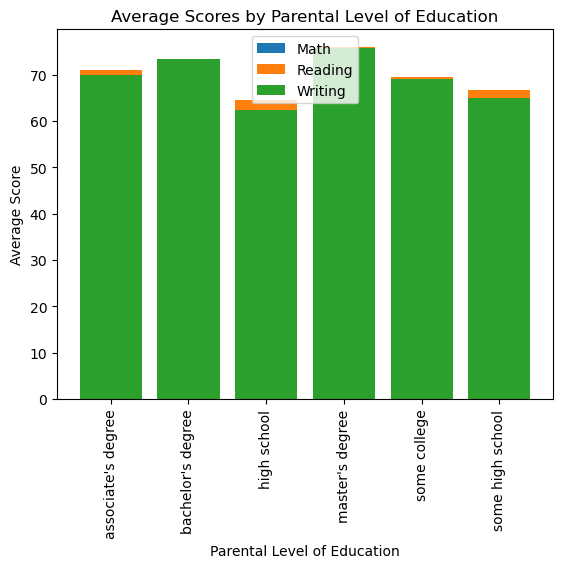

In [171]:
import matplotlib.pyplot as plt

# Group the data by parental level of education and calculate the mean score for each group
grouped_data = data.groupby('parental level of education').mean()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data['math score'], label='Math')
plt.bar(grouped_data.index, grouped_data['reading score'], label='Reading')
plt.bar(grouped_data.index, grouped_data['writing score'], label='Writing')

# Add labels and a legend
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.title('Average Scores by Parental Level of Education')
plt.legend()
plt.xticks(rotation=90)

# Display the plot
plt.show()


 from this plot we can understand that the average scores of  master's degree level of education is higher than the other education course

C:\Users\ACER\AppData\Local\Temp\ipykernel_17976\4005415523.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('parental level of education').mean()


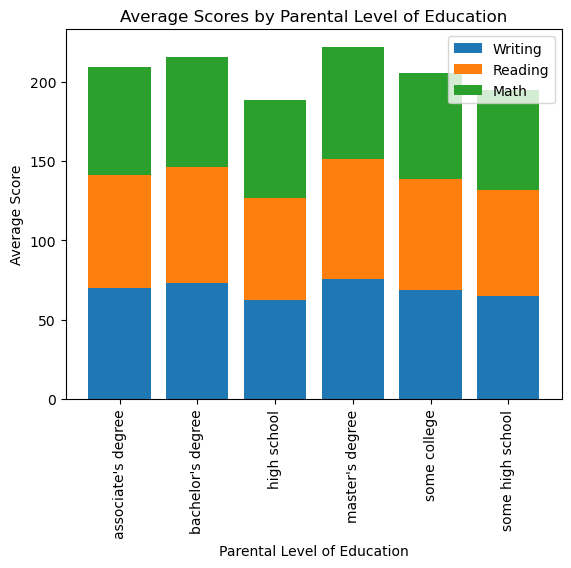

In [180]:
import matplotlib.pyplot as plt

# Group the data by parental level of education and calculate the mean score for each group
grouped_data = data.groupby('parental level of education').mean()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data['writing score'], label='Writing')
plt.bar(grouped_data.index, grouped_data['reading score'], label='Reading', bottom=grouped_data['writing score'])
plt.bar(grouped_data.index, grouped_data['math score'], label='Math', bottom=grouped_data['reading score']+grouped_data['writing score'])

# Add labels and a legend
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.title('Average Scores by Parental Level of Education')
plt.legend()

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()


# 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [105]:
import pandas as pd
import numpy as np

In [106]:
# Group the data by gender and test preparation course
grouped_data = data.groupby(['gender','test preparation course'])

In [107]:
# Calculate the mean scores for math, reading, and writing for each group
mean_scores = grouped_data.mean()
print(mean_scores)#display the mean scores for each group

                                math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948


C:\Users\ACER\AppData\Local\Temp\ipykernel_17976\2266171345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = grouped_data.mean()


>>This table shows that, on average, male students who completed the test preparation course scored the highest in maths subject, while female students who completed the course scored the highest in reading and writing.

# 4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

 To analyze the scoring variation for math, reading, and writing based on gender and test preparation course, we can calculate the measures of dispersion such as variance and standard deviation for each group.

In [111]:
# Calculate the variance and standard deviation for math, reading, and writing for each group
variance_scores = grouped_data.aggregate(np.var)
print(variance_scores)

                                math score  reading score  writing score
gender test preparation course                                          
female completed                208.173913     161.175546     149.836897
       none                     272.602767     214.241220     225.495172
male   completed                197.098133     185.297987     166.098233
       none                     205.513600     184.843553     181.394687


C:\Users\ACER\AppData\Local\Temp\ipykernel_17976\2129248186.py:2: FutureWarning: The operation <function var at 0x000002043F7828C0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  variance_scores = grouped_data.aggregate(np.var)


In [112]:
# Display the variance and standard deviation for each group
stddev_scores = grouped_data.aggregate(np.std)
print(stddev_scores)

                                math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284


C:\Users\ACER\AppData\Local\Temp\ipykernel_17976\913795568.py:2: FutureWarning: The operation <function std at 0x000002043F782710> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  stddev_scores = grouped_data.aggregate(np.std)


*The standard deviation and variance are higher for the students those who are not completed the course
*The female students those who dont complete  the course having more scoring variation for maths than male students
*The standard deviation and variance for math are generally higher than for reading and writing for all groups, indicating that the scores for math are more spread out compared to reading and writing
*Overall, these observations suggest that completing a test preparation course can help to reduce the scoring variation for math, reading, and writing, especially for male students. Additionally, female students may have a wider range of scores for math compared to male students.

5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Calculate the cutoff score for the top 25% of math scores
cutoff = data['math score'].quantile(0.75)

# Filter the original dataframe to include only students with math scores greater than or equal to the cutoff value
top_students = data[data['math score'] >= cutoff]

# Print the top students
print(top_students)


     gender race/ethnicity parental level of education         lunch  \
414  female        group A                 high school  free/reduced   
415  female        group B             master's degree  free/reduced   
416  female        group B           bachelor's degree  free/reduced   
417  female        group B             master's degree      standard   
418  female        group B                 high school      standard   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
414               completed          77             88         

These are the top 25% of students based on their math score